## Data Science Team Project
**Authors:** Kerry Effinger and Katie Zopff  
**Version:** 1.0

In [44]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


In [3]:
df = pd.read_csv('Training_set_intermediate.csv')

In [4]:
df['Number_of_prev_cond'] = df['Number_of_prev_cond'].fillna(1.0)
df['A'] = df['A'].fillna(1.0)
df['B'] = df['B'].fillna(0.0)
df['C'] = df['C'].fillna(0.0)
df['D'] = df['D'].fillna(0.0)
df['E'] = df['E'].fillna(0.0)
df['F'] = df['F'].fillna(0.0)
df['Z'] = df['Z'].fillna(0.0)

In [5]:
df = df.dropna()

In [6]:
df = df.drop(columns="Z")

In [8]:
#df

### Decimal Normalization

In [9]:
df_normalized = df

In [10]:
df_normalized['Patient_Age'] = df_normalized['Patient_Age']/100
df_normalized['Patient_Body_Mass_Index'] = df_normalized['Patient_Body_Mass_Index']/100

## **Splitting Data**

In [11]:
from sklearn.model_selection import train_test_split

In [13]:
X = np.array(df[['Patient_Age', 'Patient_Body_Mass_Index', 'Number_of_prev_cond']])
y = np.array(df['Survived_1_year'])

X_norm = np.array(df_normalized[['Patient_Age', 'Patient_Body_Mass_Index', 'Number_of_prev_cond']])
y_norm = np.array(df_normalized['Survived_1_year'])

In [14]:
X_norm

array([[0.56      , 0.18479385, 2.        ],
       [0.36      , 0.22945566, 1.        ],
       [0.48      , 0.27510027, 1.        ],
       ...,
       [0.63      , 0.27500039, 1.        ],
       [0.25      , 0.23719125, 2.        ],
       [0.5       , 0.18391156, 4.        ]])

### Code to split data 60/20/20 

In [15]:
x_train, x_test_prime, y_train, y_test_prime = train_test_split(X, y, test_size=.40, random_state=42)

In [16]:
x_validate, x_test, y_validate, y_test = train_test_split(x_test_prime, y_test_prime, test_size=.50, random_state=42)

In [17]:
print(len(x_train), len(x_validate), len(x_test))

13850 4617 4617


In [18]:
x_train_norm, x_test_prime_norm, y_train_norm, y_test_prime_norm = train_test_split(X_norm, y_norm, test_size=.40, random_state=42)

In [19]:
x_validate_norm, x_test_norm, y_validate_norm, y_test_norm = train_test_split(x_test_prime_norm, y_test_prime_norm, test_size=.50, random_state=42)

In [21]:
print(len(x_train_norm), len(x_validate_norm), len(x_test_norm))

13850 4617 4617


### Code to split 80/10/10

Raw Data

In [23]:
x_train2, x_test_prime2, y_train2, y_test_prime2 = train_test_split(X, y, test_size=.20, random_state=42)

In [24]:
x_validate2, x_test2, y_validate2, y_test2 = train_test_split(x_test_prime2, y_test_prime2, test_size=.50, random_state=42)

In [25]:
print(len(x_train2), len(x_validate2), len(x_test2))

18467 2308 2309


Decimal Scaled Data

In [26]:
x_train2_norm, x_test_prime2_norm, y_train2_norm, y_test_prime2_norm = train_test_split(X_norm, y_norm, test_size=.20, random_state=42)

In [27]:
x_validate2_norm, x_test2_norm, y_validate2_norm, y_test2_norm = train_test_split(x_test_prime2_norm, y_test_prime2_norm, test_size=.50, random_state=42)

In [28]:
print(len(x_train2_norm), len(x_validate2_norm), len(x_test2_norm))

18467 2308 2309


Normalized Data (on github), could use decimal and another form of normalizing to try ang get a higher accuracy. Could also use another model other than decison tree. 

### Creating decision tree model

In [29]:
from sklearn import tree

In [30]:
treemodel = tree.DecisionTreeClassifier()

In [31]:
treemodel = treemodel.fit(x_train,y_train)

In [32]:
y_validate_pred = treemodel.predict(x_validate)

In [57]:
treemodel2 = treemodel.fit(x_train2,y_train2)

In [58]:
y_validate_pred2 = treemodel.predict(x_validate2)

In [34]:
treemodel3 = treemodel.fit(x_train_norm, y_train_norm)

In [37]:
y_validate_pred3 = treemodel.predict(x_validate_norm)

In [39]:
treemodel4 = treemodel.fit(x_train2_norm, y_train2_norm)

In [40]:
y_validate_pred4 = treemodel.predict(x_validate2_norm)

In [41]:
from sklearn.datasets import load_iris
from sklearn import tree
A, b = load_iris(return_X_y=True)
tree2 = tree.DecisionTreeClassifier()
tree2 = treemodel.fit(A, b)

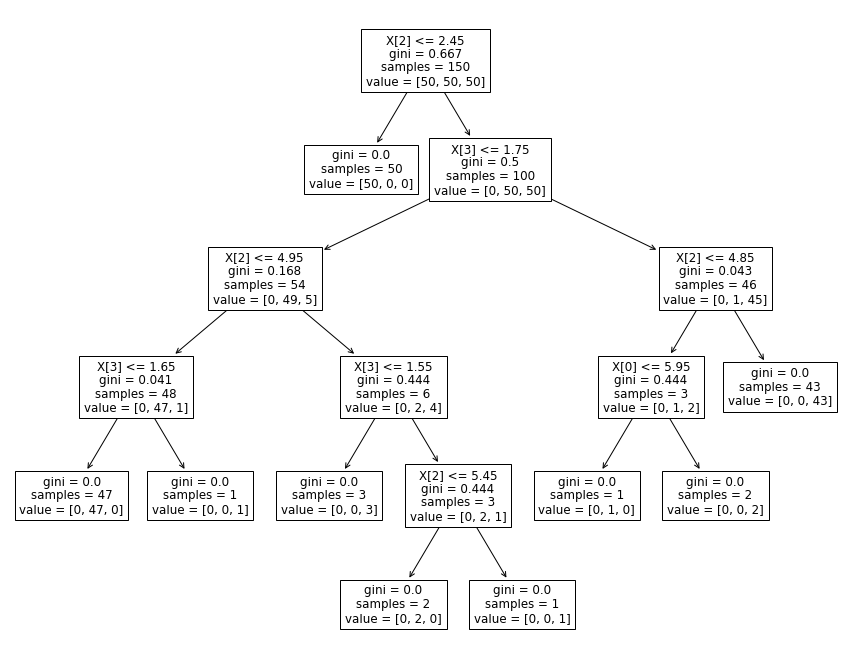

In [48]:
fig = plt.figure(figsize=(15,12))
tree.plot_tree(treemodel)
plt.savefig('DecisionTree1.png')

## **Measuring Performance**

In [50]:
from sklearn import metrics

In [51]:
accuracy = metrics.accuracy_score(y_validate,y_validate_pred)
precision = metrics.precision_score(y_validate,y_validate_pred)
sensitivity = metrics.recall_score(y_validate,y_validate_pred)
f_measure = metrics.f1_score(y_validate,y_validate_pred)

In [63]:
print(f"Metrics for 60/20/20 split are: \n accuracy:{accuracy}, precision:{precision}, \n sensitivity:{sensitivity}, and F measure:{f_measure}")

Metrics for 60/20/20 split are: 
 accuracy:0.6159844054580896, precision:0.7098214285714286, 
 sensitivity:0.6577042399172699, and F measure:0.6827697262479872


In [59]:
accuracy2 = metrics.accuracy_score(y_validate2,y_validate_pred2)
precision2 = metrics.precision_score(y_validate2,y_validate_pred2)
sensitivity2 = metrics.recall_score(y_validate2,y_validate_pred2)
f_measure2 = metrics.f1_score(y_validate2,y_validate_pred2)

In [61]:
print(f"Metrics for 80/10/10 split are:\n accuracy:{accuracy2}, precision:{precision2}, \n sensitivity:{sensitivity2}, and F measure:{f_measure2}")

Metrics for 80/10/10 split are:
 accuracy:0.6442807625649913, precision:0.7373371924746743, 
 sensitivity:0.6899119837508463, and F measure:0.7128366561734871


In [64]:
accuracy3 = metrics.accuracy_score(y_validate_norm,y_validate_pred3)
precision3 = metrics.precision_score(y_validate_norm,y_validate_pred3)
sensitivity3 = metrics.recall_score(y_validate_norm,y_validate_pred3)
f_measure3 = metrics.f1_score(y_validate_norm,y_validate_pred3)

In [66]:
print(f"Metrics for Normalized 60/20/20 split are:\n accuracy:{accuracy3}, precision:{precision3}, \n sensitivity:{sensitivity3}, and F measure:{f_measure3}")

Metrics for Normalized 60/20/20 split are:
 accuracy:0.6164175871778211, precision:0.7112939416604338, 
 sensitivity:0.655635987590486, and F measure:0.6823318385650224


In [65]:
accuracy4 = metrics.accuracy_score(y_validate2_norm,y_validate_pred4)
precision4 = metrics.precision_score(y_validate2_norm,y_validate_pred4)
sensitivity4 = metrics.recall_score(y_validate2_norm,y_validate_pred4)
f_measure4 = metrics.f1_score(y_validate2_norm,y_validate_pred4)

In [67]:
print(f"Metrics for Normalized 80/10/10 split are:\n accuracy:{accuracy4}, precision:{precision4}, \n sensitivity:{sensitivity4}, and F measure:{f_measure4}")

Metrics for Normalized 80/10/10 split are:
 accuracy:0.6473136915077989, precision:0.7396963123644251, 
 sensitivity:0.6926201760324983, and F measure:0.7153846153846153
